<a href="https://colab.research.google.com/github/shamim-code/Data_Mining_Practice/blob/main/Heart_Disease_Prediction(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df=pd.read_csv('/content/Heart_Dataset.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26377,No,30.04,No,No,No,0.0,15.0,No,Female,25-29,American Indian/Alaskan Native,No,Yes,Very good,4.0,No,No,No
26378,No,27.20,No,No,No,0.0,5.0,No,Male,25-29,White,No,Yes,Excellent,8.0,No,No,No
26379,No,25.66,Yes,No,No,0.0,0.0,No,Male,30-34,White,No,Yes,Excellent,6.0,No,No,No
26380,No,26.63,Yes,No,No,0.0,10.0,No,Female,55-59,White,No,Yes,Very good,6.0,No,No,No


In [29]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,26382.000000,26382.000000,26382.000000,26382.000000
mean,28.182574,3.782238,3.947123,7.136874
std,6.349593,8.358024,7.946838,1.499008
min,12.400000,0.000000,0.000000,1.000000
25%,23.750000,0.000000,0.000000,6.000000
50%,27.250000,0.000000,0.000000,7.000000
75%,31.320000,2.000000,4.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


In [44]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [45]:
df.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [46]:
dummies=pd.get_dummies(df['BMI'])
dummies

,12.40,12.48,12.53,12.65,12.75,13.02,13.29,13.31,13.59,13.72,...,71.45,71.80,72.56,75.17,75.77,75.82,79.10,81.46,82.76,83.00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
marged=pd.concat([df,dummies],axis='columns')
marged

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,71.45,71.8,72.56,75.17,75.77,75.82,79.1,81.46,82.76,83.0
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,0,0,0,0,0,0,0,0,0,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,0,0,0,0,0,0,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,0,0,0,0,0,0,0,0,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,0,0,0,0,0,0,0,0,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26377,No,30.04,No,No,No,0.0,15.0,No,Female,25-29,...,0,0,0,0,0,0,0,0,0,0
26378,No,27.20,No,No,No,0.0,5.0,No,Male,25-29,...,0,0,0,0,0,0,0,0,0,0
26379,No,25.66,Yes,No,No,0.0,0.0,No,Male,30-34,...,0,0,0,0,0,0,0,0,0,0
26380,No,26.63,Yes,No,No,0.0,10.0,No,Female,55-59,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          1
dtype: int64

In [49]:
df=df.dropna(how='any', axis=0)

In [50]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [51]:
df.shape

(26381, 18)

In [52]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [53]:
X=df[['PhysicalHealth']].values
X

array([[ 3.],
       [ 0.],
       [20.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]])

In [54]:
Y=df[['MentalHealth']]
Y

,MentalHealth
0,30.0
1,0.0
2,30.0
3,0.0
4,0.0
...,...
26376,5.0
26377,15.0
26378,5.0
26379,0.0


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
reg=LinearRegression()

In [58]:
X_train

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [ 2.],
       [ 1.],
       [20.]])

In [59]:
Y_train

,MentalHealth
9934,0.0
8709,10.0
6601,2.0
3168,0.0
5433,0.0
...,...
1029,0.0
12645,7.0
24160,0.0
1248,1.0


In [60]:
reg.fit(X_train,Y_train)

LinearRegression()

In [61]:
reg.coef_

array([[0.26100348]])

In [62]:
reg.intercept_

array([2.90860201])

In [64]:
reg.score(X_test,Y_test)

0.08868347083162575

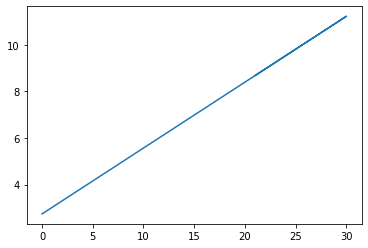

In [ ]:
plt.plot(X_train,reg.predict(X_train))

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['MentalHealth']]=df[['MentalHealth']].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#One-hot encoding
df=pd.get_dummies(df)
df.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,28,5.0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0,7.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,28,8.0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
5,28.87,6.0,0,12.0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
6,21.63,15.0,0,4.0,1,0,1,0,1,0,...,1,0,0,0,0,1,1,0,0,1
7,31.64,5.0,0,9.0,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,1,0
8,26.45,0.0,0,5.0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
9,40.69,0.0,0,10.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


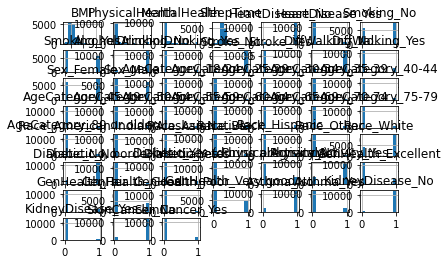

In [ ]:
df.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


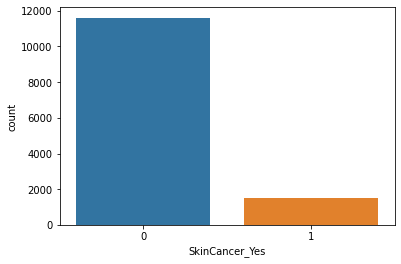

In [ ]:
import seaborn as sns
sns.countplot(df['SkinCancer_Yes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


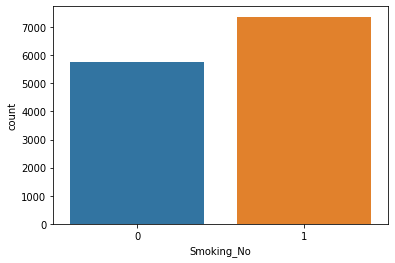

In [ ]:
sns.countplot(df['Smoking_No'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


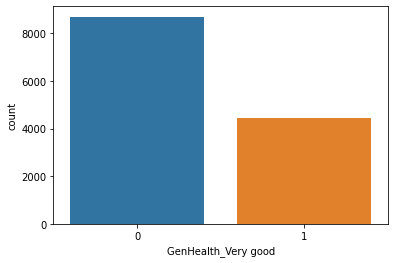

In [ ]:
sns.countplot(df['GenHealth_Very good'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


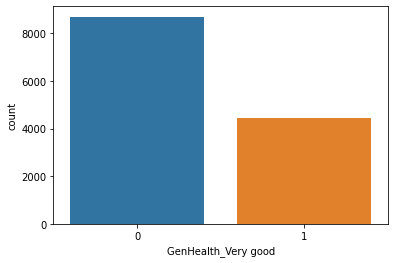

In [ ]:
sns.countplot(df['GenHealth_Very good'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


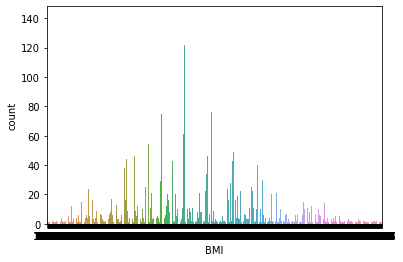

In [ ]:
sns.countplot(df['BMI'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


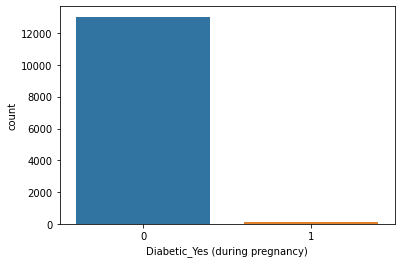

In [ ]:
sns.countplot(df['Diabetic_Yes (during pregnancy)'])

In [32]:
import seaborn as sns

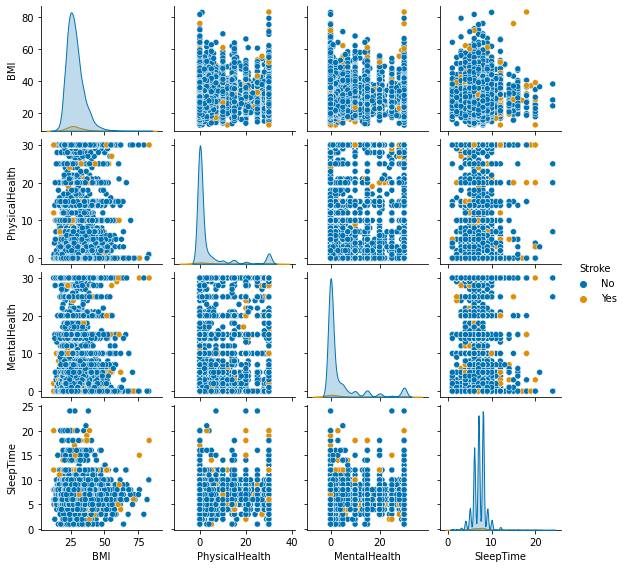

In [33]:
sns.pairplot(df,hue='Stroke', height = 2, palette = 'colorblind')

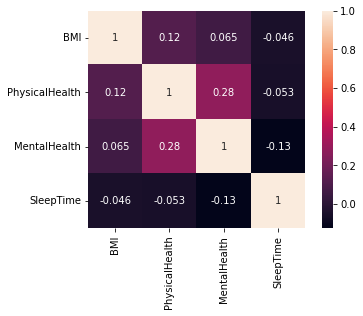

In [36]:
cormat=df.corr()
sns.heatmap(cormat,annot=True,square=True)